In [30]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: matplotlib in c:\users\sfari\appdata\local\programs\python\python313\lib\site-packages (3.10.0)




[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


IMPORTS

In [31]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import py_funcs as pf

sn.set_theme(style='darkgrid')

PROCESS HERB DATA

In [32]:
#Read the data
dfht = pd.read_csv('./data/herb_transplants_raw.csv')
dfht.columns = ['pot','species','co2_lvl','water_lvl','ag_biomass','bg_biomass','rep_biomass','flowers_num',
                'fruit_num','transplanted_w_leaf','transplanted_w_radicle','comment']

In [33]:
dfht.head()

,pot,species,co2_lvl,water_lvl,ag_biomass,bg_biomass,rep_biomass,flowers_num,fruit_num,transplanted_w_leaf,transplanted_w_radicle,comment
0,19,MIGU,Ambient,Fluct,0.1255,0.0683,0.0789,10.0,NaN,8,0,NaN
1,42,MIGU,Ambient,Fluct,0.0349,0.0177,0.0568,3.0,6.0,10,0,NaN
2,53,MIGU,Ambient,Fluct,0.0556,0.0432,0.0312,7.0,NaN,1,0,NaN
3,105,MIGU,Ambient,Fluct,0.1489,0.1361,0.0970,12.0,NaN,10,0,NaN
4,140,MIGU,Ambient,Fluct,0.1629,0.1291,0.1041,2.0,12.0,8,0,NaN


In [34]:
# dfht.describe()

In [35]:
#Check data completeness
print(dfht.isna().sum(), '\n-----------\n')

#By species
spec = dfht.species.unique()
print('SPECIES:', spec, '\n----------\n')

for sp in spec:
    print('Species:', sp)
    print(dfht[dfht.species == sp].isna().sum())
    print('----------')

pot                         0
species                     0
co2_lvl                     0
water_lvl                   0
ag_biomass                 47
bg_biomass                 47
rep_biomass               121
flowers_num               122
fruit_num                 143
transplanted_w_leaf         0
transplanted_w_radicle      0
comment                   126
dtype: int64 
-----------

SPECIES: ['MIGU' 'NAOF' 'POMO' 'SIIR' 'VEAN'] 
----------

Species: MIGU
pot                        0
species                    0
co2_lvl                    0
water_lvl                  0
ag_biomass                 9
bg_biomass                 9
rep_biomass               14
flowers_num               16
fruit_num                 31
transplanted_w_leaf        0
transplanted_w_radicle     0
comment                   26
dtype: int64
----------
Species: NAOF
pot                        0
species                    0
co2_lvl                    0
water_lvl                  0
ag_biomass                 2
bg_biomas

In [36]:
#Drop Sisymbrium irio
dfht = dfht[dfht.species != 'SIIR']
species_nm = dfht.species.unique()
print(species_nm)

['MIGU' 'NAOF' 'POMO' 'VEAN']


In [37]:
#Look at the data types
dfht.dtypes

pot                         int64
species                    object
co2_lvl                    object
water_lvl                  object
ag_biomass                float64
bg_biomass                float64
rep_biomass               float64
flowers_num               float64
fruit_num                 float64
transplanted_w_leaf         int64
transplanted_w_radicle      int64
comment                    object
dtype: object

In [38]:
#Feature Engineering
dfht['co2_cat'] = dfht['co2_lvl'].copy()

dfht['total_cnt'] = dfht.transplanted_w_leaf + dfht.transplanted_w_radicle
dfht['ag_biomass_m'] = dfht.ag_biomass/dfht.total_cnt
dfht['total_biomass'] = dfht.ag_biomass + dfht.bg_biomass
dfht['log_total_biomass'] = np.log(dfht.total_biomass)

#Create one-hot encoded versions of the treatments
df = dfht.copy()
df = df[df.co2_lvl.isna()==False]
df = df[df.total_biomass.isna()==False]

df = df.drop(columns=['comment'])
df['co2_lvl'] = np.where(df['co2_lvl'] == 'High', 1, 0)
df['water_low'] = np.where(df['water_lvl'] == 'Low', 1, 0)
df['water_fluct'] = np.where(df['water_lvl'] == 'Fluct', 1, 0)
df['water_high'] = np.where(df['water_lvl'] == 'High', 1, 0)

df.loc[(df['co2_lvl']==0) & (df['water_fluct']==1), 'treatment'] = 'CO2Amb_WA'
df.loc[(df['co2_lvl']==0) & (df['water_low']==1), 'treatment'] = 'CO2Amb_WL'
df.loc[(df['co2_lvl']==0) & (df['water_high']==1), 'treatment'] = 'CO2Amb_WH'
df.loc[(df['co2_lvl']==1) & (df['water_fluct']==1), 'treatment'] = 'CO2High_WA'
df.loc[(df['co2_lvl']==1) & (df['water_low']==1), 'treatment'] = 'CO2High_WL'
df.loc[(df['co2_lvl']==1) & (df['water_high']==1), 'treatment'] = 'CO2High_WH'

#Drop the MIGU, low water, ambient CO2 treatment due to low sample size (1)
df = df[~((df['species'] == 'MIGU' ) & ((df['co2_cat'] == 'Ambient') & (df['water_lvl'] == 'Low')))]

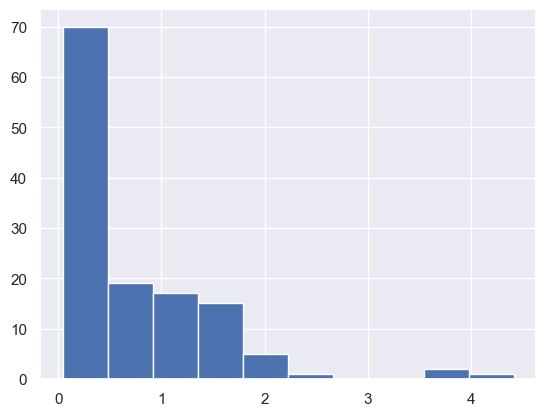

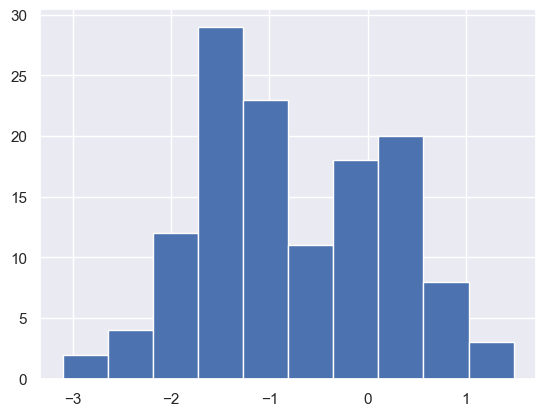

In [39]:
#Distribution of total biomass
df.total_biomass.hist(bins=10)
plt.show()

#Distribution of total biomass
df.log_total_biomass.hist(bins=10)
plt.show()

<Axes: xlabel='species', ylabel='total_biomass'>

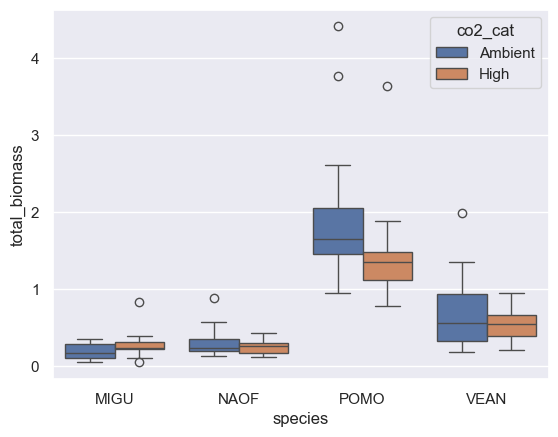

In [40]:
#Total biomass by species and CO2 level
sn.boxplot(data=df, x='species', y='total_biomass', hue='co2_cat')

<Axes: xlabel='water_lvl', ylabel='total_biomass'>

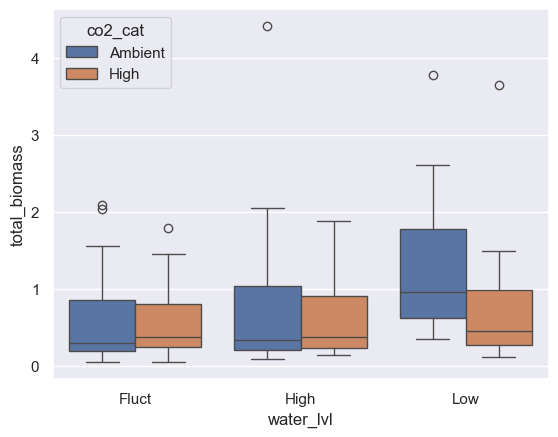

In [41]:
#Total biomass by water and CO2 level
sn.boxplot(data=df, x='water_lvl', y='total_biomass', hue='co2_cat')

In [42]:
def plot_multiple_boxplots(df, by, x, y, hue, subplots = {'nrows':1, 'ncols':2, 'figsize':(None,None)},palette=None,
                           order=['Fluct','Low','High'],
                           xlabel=None,ylabel=None,legend_title=None,suptitle=None,fig_save_path=None):
    df = df.dropna(subset=[y])
    df['total_biomass'] = np.log10(df['total_biomass'])
    by_labels = df[by].unique()
    fig, axes = plt.subplots(**subplots)
    cnt = 0
    while cnt < len(by_labels):
        for irow in range(subplots['nrows']):
            for icol in range(subplots['ncols']):
                label = by_labels[cnt]
                dftmp = df[df[by] == label]
                axi = axes[irow,icol]
                sn.boxplot(data = dftmp, x=x, y=y, hue=hue, ax = axi, order=order,
                           palette=palette)
                axi.set_title(label, fontsize = 13)
                axi.set_xlabel('')
                axi.set_ylabel('')
                axi.get_legend().remove()
                cnt = cnt+1
                handles, labels = axi.get_legend_handles_labels()
    fig.suptitle(suptitle, fontsize=14)
    fig.legend(handles, labels, loc='upper right', title=legend_title)
    fig.text(0.5, 0.05, xlabel, ha='center', fontsize = 12)
    fig.text(0.07, 0.5, ylabel, va='center', rotation='vertical', fontsize = 12)
    if fig_save_path != None:
        plt.savefig(fig_save_path)
    plt.show()

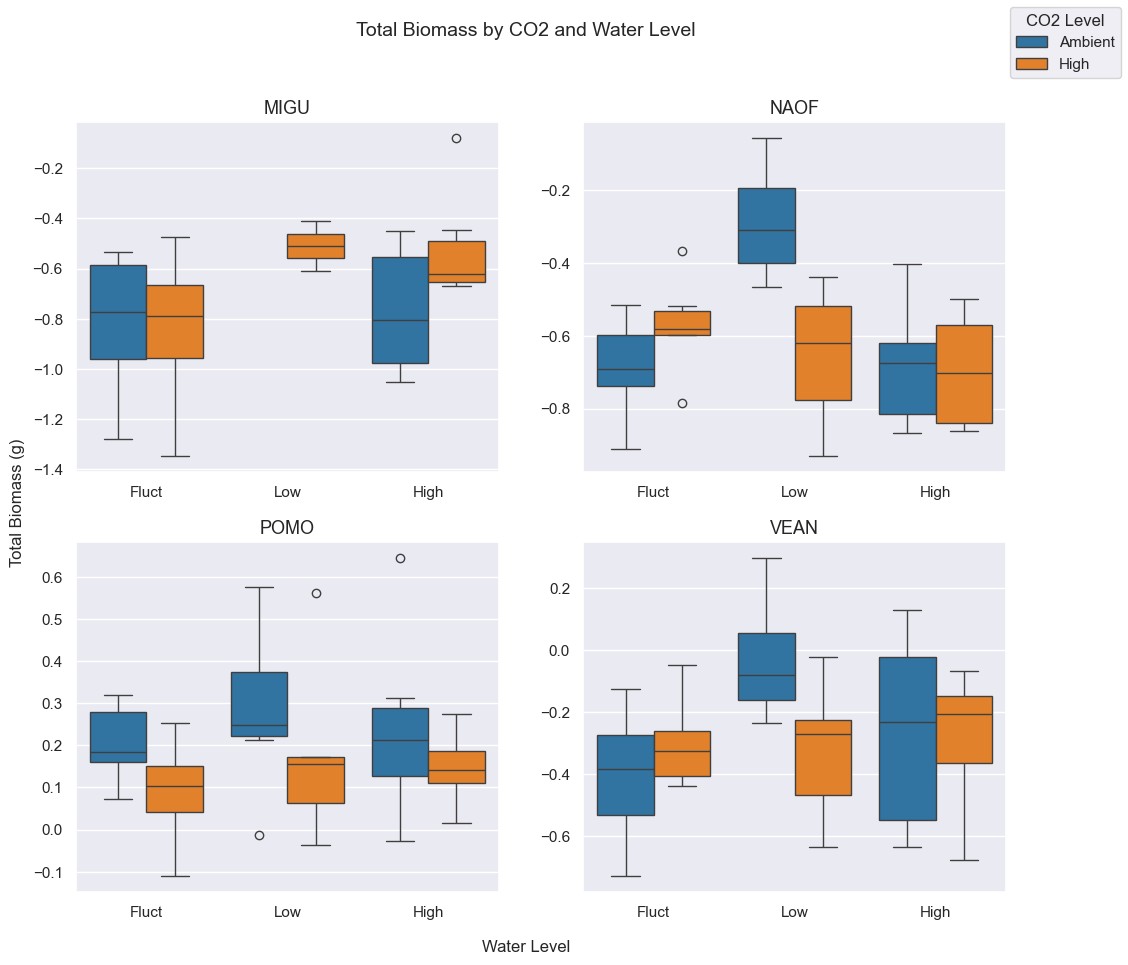

In [43]:
#Look at biomass broken out by species
plot_multiple_boxplots(df, by = 'species', x = 'water_lvl', y = 'total_biomass', 
                           hue = 'co2_cat', subplots = {'nrows':2, 'ncols':2, 'figsize':(12,10)}, 
                           palette=['tab:blue','tab:orange'],
                           xlabel='Water Level', ylabel='Total Biomass (g)',legend_title='CO2 Level',
                           suptitle='Total Biomass by CO2 and Water Level',
                           fig_save_path='figures/herbs_total_biomass_by_co2_by_water_lvl.png')

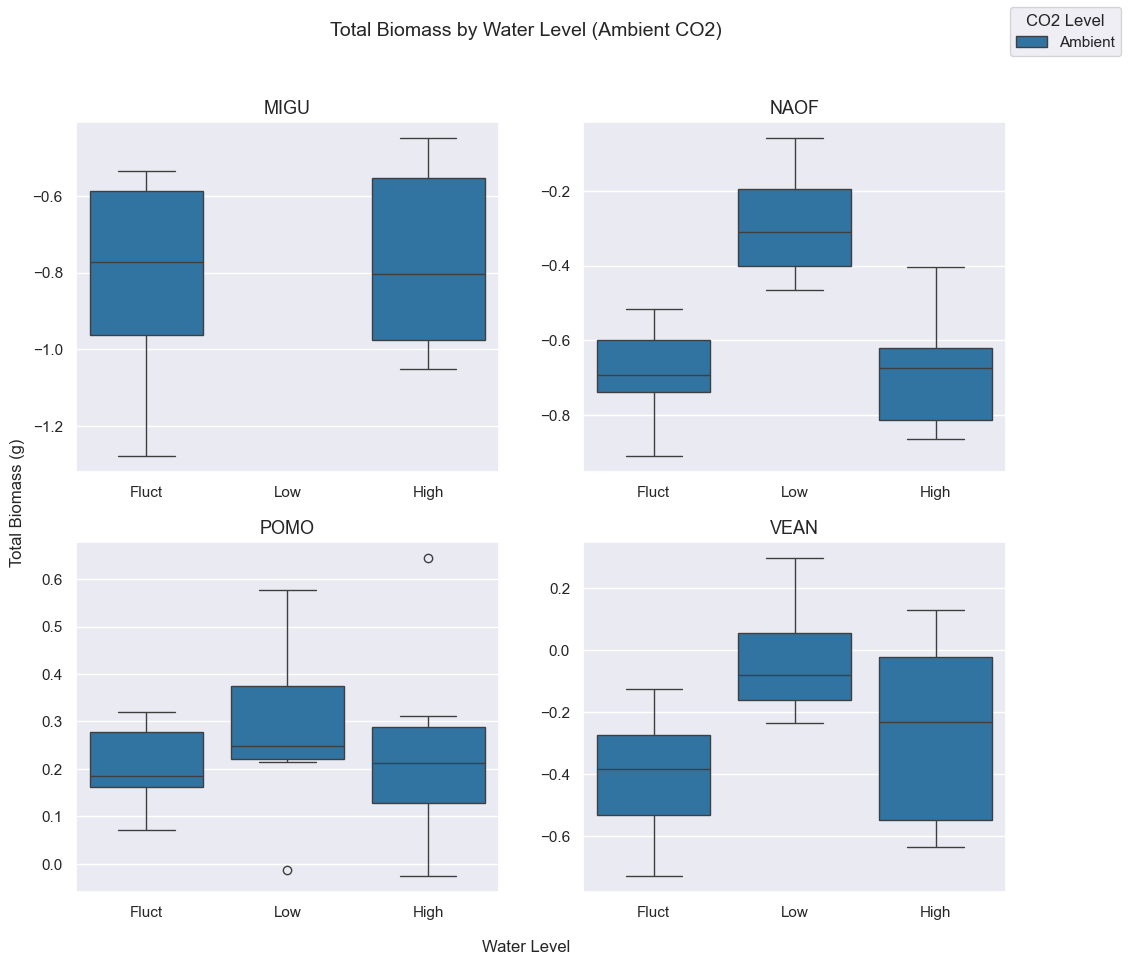

In [44]:
#Look at biomass broken out by species
plot_multiple_boxplots(df[df['co2_cat']=='Ambient'], by = 'species', x = 'water_lvl', y = 'total_biomass', 
                           hue = 'co2_cat', subplots = {'nrows':2, 'ncols':2, 'figsize':(12,10)},
                           palette=['tab:blue'],
                           xlabel='Water Level', ylabel='Total Biomass (g)',legend_title='CO2 Level',
                           suptitle='Total Biomass by Water Level (Ambient CO2)',
                           fig_save_path='figures/herbs_total_biomass_by_water_lvl.png')

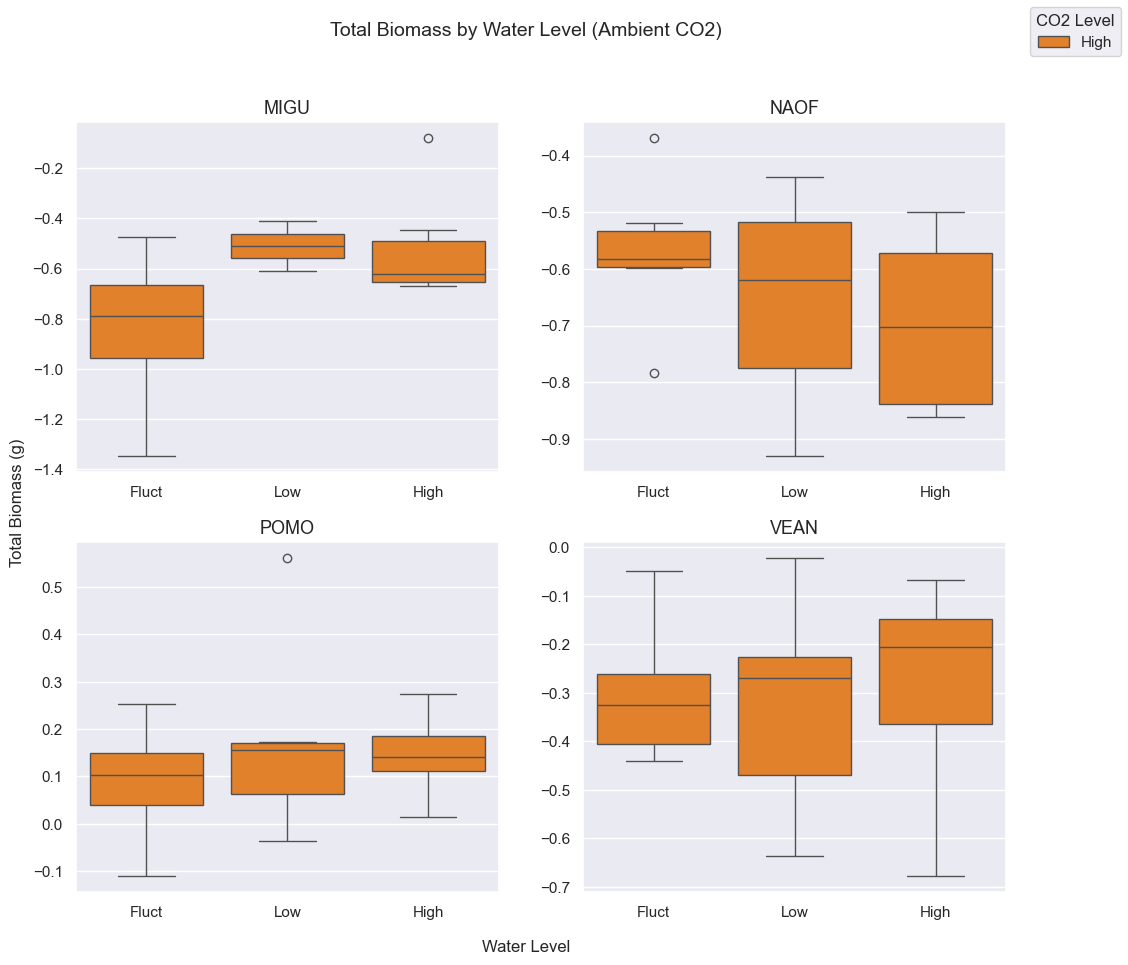

In [45]:
#Look at biomass broken out by species
plot_multiple_boxplots(df[df['co2_cat']=='High'], by = 'species', x = 'water_lvl', y = 'total_biomass', 
                           hue = 'co2_cat', subplots = {'nrows':2, 'ncols':2, 'figsize':(12,10)},
                           palette=['tab:orange'],
                           xlabel='Water Level', ylabel='Total Biomass (g)',legend_title='CO2 Level',
                           suptitle='Total Biomass by Water Level (Ambient CO2)',
                           fig_save_path='figures/herbs_total_biomass_by_co2.png')

In [46]:
# #Look at biomass broken out by species
# plot_multiple_boxplots(df, by = 'species', x = 'co2_cat', y = 'total_biomass', 
#                            hue = 'co2_cat', subplots = {'nrows':2, 'ncols':2, 'figsize':(12,10)}, order=['Ambient','High'],
#                            palette=['tab:blue','tab:orange'],
#                            xlabel='Water Level', ylabel='Total Biomass (g)',legend_title='CO2 Level',
#                            suptitle='Total Biomass by Water Level (High CO2)')

In [47]:
# #Look at biomass broken out by species
# pf.plot_multiple_boxplots(dfht, by = 'species', x = 'water_lvl', y = 'log_total_biomass', 
#                            hue = 'co2_lvl', subplots = {'nrows':2, 'ncols':2, 'figsize':(12,10)})

In [48]:
df.treatment.value_counts()

treatment
CO2Amb_WA     24
CO2Amb_WH     24
CO2High_WA    24
CO2High_WH    24
CO2High_WL    20
CO2Amb_WL     14
Name: count, dtype: int64

In [49]:
df.to_csv('herb_transplants_model_rdy.csv')

PROCESS WOODY DATA

In [50]:
#Read the data
dfwt = pd.read_csv('./data/woody_transplants_raw.csv')
dfwt.columns = ['num','species','chamber','shelf','water_lvl','rep','ag_biomass','bg_biomass','diam','stem_len','root_len','ag2','bg2']
#Drop ALCE species (low samples)
dfwt = dfwt[dfwt.species != 'ALCE']

In [51]:
dfwt.head()

,num,species,chamber,shelf,water_lvl,rep,ag_biomass,bg_biomass,diam,stem_len,root_len,ag2,bg2
5,6,CEOC,1,TL,H,1,0.0077,0.0078,0.78,1.0,NaN,NaN,NaN
6,7,CEOC,1,TR,L,2,0.0205,0.0852,1.01,2.7,NaN,NaN,NaN
7,8,CEOC,1,TR,A,2,0.0127,0.0713,0.9,1.5,NaN,NaN,NaN
8,9,CEOC,1,B,H,3,0.0073,0.031,0.8,1.0,NaN,NaN,NaN
9,10,CEOC,1,TL,L,4,0.004,0.0057,0.56,1.3,NaN,NaN,NaN


In [52]:
#Check data completeness
print(dfwt.isna().sum(), '\n-----------\n')

#By species
spec = dfwt.species.unique()
print('SPECIES:', spec, '\n----------\n')

for sp in spec:
    print('Species:', sp)
    print(dfwt[dfwt.species == sp].isna().sum())
    print('----------')

num             0
species         0
chamber         0
shelf           0
water_lvl       0
rep             0
ag_biomass      0
bg_biomass      3
diam            3
stem_len      108
root_len      143
ag2           139
bg2           139
dtype: int64 
-----------

SPECIES: ['CEOC' 'POFR' 'SAGO' 'TACH'] 
----------

Species: CEOC
num            0
species        0
chamber        0
shelf          0
water_lvl      0
rep            0
ag_biomass     0
bg_biomass     2
diam           2
stem_len       2
root_len      35
ag2           34
bg2           34
dtype: int64
----------
Species: POFR
num            0
species        0
chamber        0
shelf          0
water_lvl      0
rep            0
ag_biomass     0
bg_biomass     0
diam           0
stem_len      34
root_len      36
ag2           36
bg2           36
dtype: int64
----------
Species: SAGO
num            0
species        0
chamber        0
shelf          0
water_lvl      0
rep            0
ag_biomass     0
bg_biomass     1
diam           1
st

In [53]:
#Data types
dfwt.dtypes

num             int64
species        object
chamber         int64
shelf          object
water_lvl      object
rep             int64
ag_biomass     object
bg_biomass     object
diam           object
stem_len      float64
root_len      float64
ag2           float64
bg2           float64
dtype: object

In [54]:
#Feature Engineering

for col in ['ag_biomass','bg_biomass','chamber']:
    dfwt[col] = pd.to_numeric(dfwt[col], errors='coerce')

#When there are multiple seedlings for the sample, average the biomass for that sample
dfwt['ag_biomass'] = dfwt[['ag_biomass', 'ag2']].mean(axis=1)
dfwt['bg_biomass'] = dfwt[['bg_biomass', 'bg2']].mean(axis=1)

for col in ['ag_biomass','bg_biomass','chamber']:
    dfwt[col] = pd.to_numeric(dfwt[col], errors='coerce')
dfwt['total_biomass'] = dfwt.ag_biomass + dfwt.bg_biomass
dfwt['log_total_biomass'] = np.log(dfwt['total_biomass'])
dfwt.loc[dfwt['chamber'].isin([1,2]), 'co2_lvl'] = 'Ambient'
dfwt.loc[dfwt['chamber'].isin([3,4]), 'co2_lvl'] = 'High'
dfwt = dfwt.sort_values(['species','water_lvl','co2_lvl'])
dfwt.isna().sum()

dfwt.loc[dfwt['water_lvl'] == 'L', 'water_lvl'] = 'Low'
dfwt.loc[dfwt['water_lvl'] == 'A', 'water_lvl'] = 'Fluct'
dfwt.loc[dfwt['water_lvl'] == 'H', 'water_lvl'] = 'High'

#One-hot encode the treatments for features
df2 = dfwt.copy()
df2['co2_cat'] = df2['co2_lvl'].copy()
df2 = df2[df2.co2_lvl.isna()==False]
df2 = df2[df2.total_biomass.isna()==False]

df2['co2_lvl'] = np.where(df2['co2_lvl'] == 'High', 1, 0)
df2['water_low'] = np.where(df2['water_lvl'] == 'Low', 1, 0)
df2['water_fluct'] = np.where(df2['water_lvl'] == 'Fluct', 1, 0)
df2['water_high'] = np.where(df2['water_lvl'] == 'High', 1, 0)

df2.loc[(df2['co2_lvl']==0) & (df2['water_fluct']==1), 'treatment'] = 'CO2Amb_WA'
df2.loc[(df2['co2_lvl']==0) & (df2['water_low']==1), 'treatment'] = 'CO2Amb_WL'
df2.loc[(df2['co2_lvl']==0) & (df2['water_high']==1), 'treatment'] = 'CO2Amb_WH'
df2.loc[(df2['co2_lvl']==1) & (df2['water_fluct']==1), 'treatment'] = 'CO2High_WA'
df2.loc[(df2['co2_lvl']==1) & (df2['water_low']==1), 'treatment'] = 'CO2High_WL'
df2.loc[(df2['co2_lvl']==1) & (df2['water_high']==1), 'treatment'] = 'CO2High_WH'

###Random effect is shelf

df2['shelf'] = np.where(df2['shelf'] == 'B', 1, df2['shelf'])
df2['shelf'] = np.where(df2['shelf'] == 'TL', 2, df2['shelf'])
df2['shelf'] = np.where(df2['shelf'] == 'TR', 3, df2['shelf'])

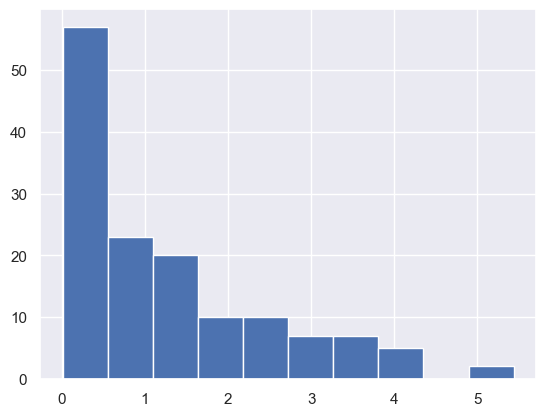

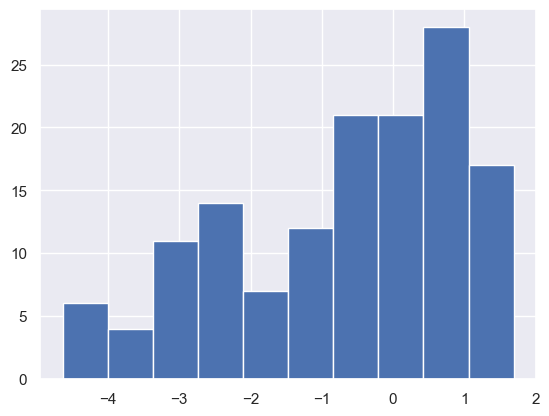

In [55]:
#Distribution of total biomass
dfwt.total_biomass.hist(bins=10)
plt.show()

dfwt.log_total_biomass.hist(bins=10)
plt.show()

<Axes: xlabel='species', ylabel='total_biomass'>

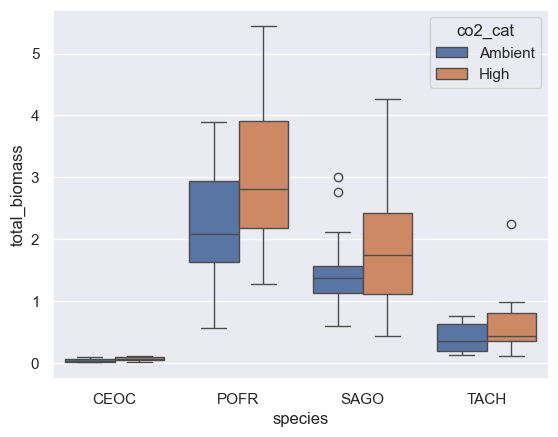

In [56]:
#Plot total biomass by species and CO2 level
sn.boxplot(data=df2, x='species', y='total_biomass', hue='co2_cat')

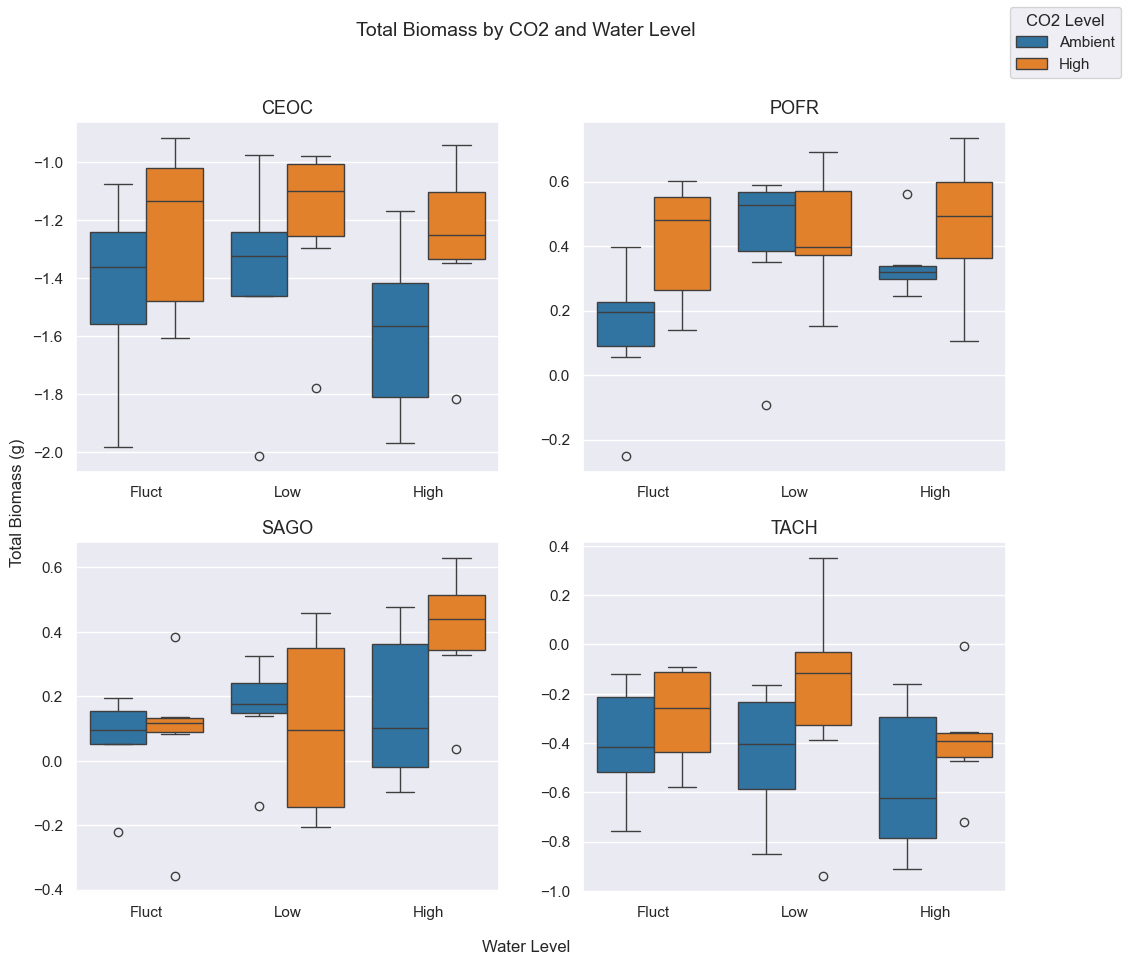

In [57]:
#Break down by species
#Look at biomass broken out by species
plot_multiple_boxplots(df2, by = 'species', x = 'water_lvl', y = 'total_biomass', 
                           hue = 'co2_cat', subplots = {'nrows':2, 'ncols':2, 'figsize':(12,10)}, 
                           palette=['tab:blue','tab:orange'],
                           xlabel='Water Level', ylabel='Total Biomass (g)',legend_title='CO2 Level',
                           suptitle='Total Biomass by CO2 and Water Level',
                           fig_save_path='figures/woody_total_biomass_by_co2_by_water_lvl.png')

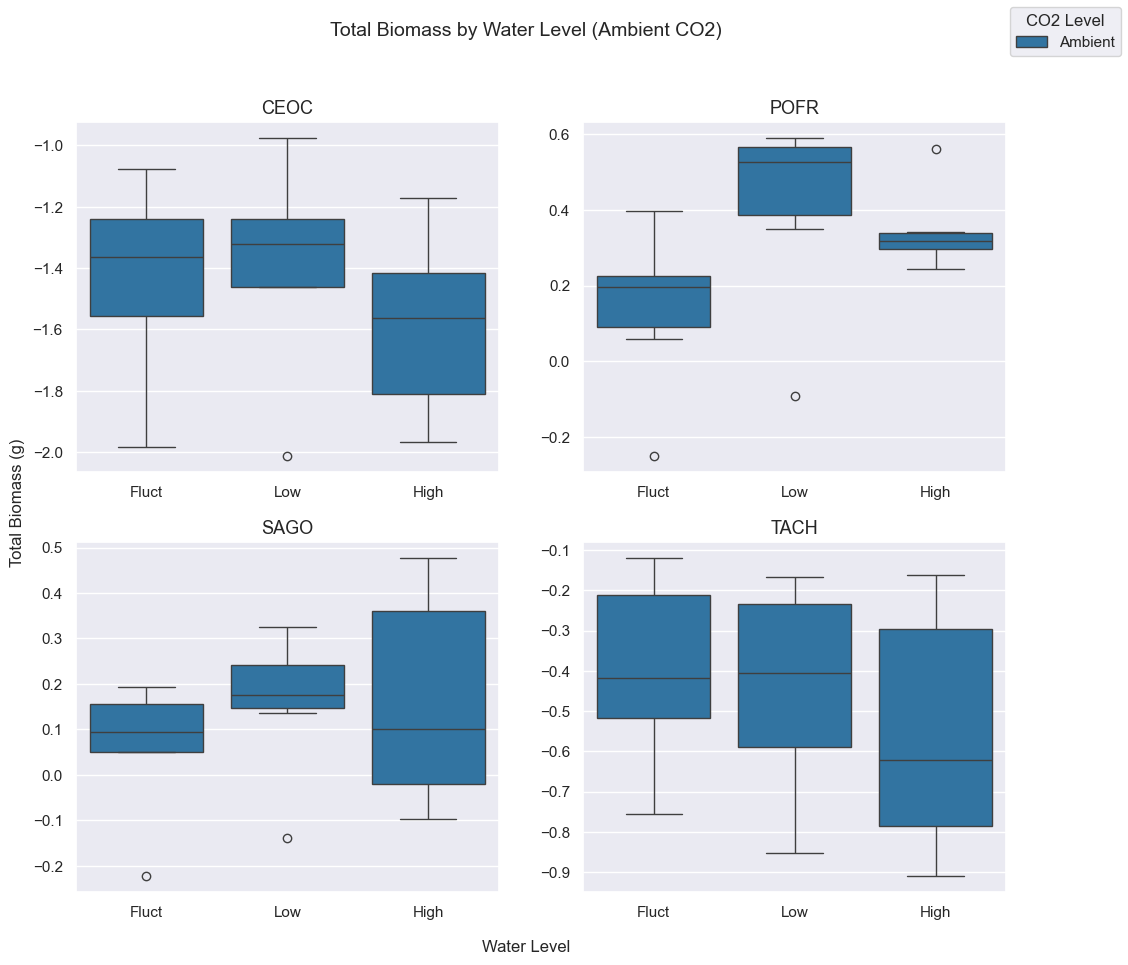

In [58]:
plot_multiple_boxplots(df2[df2['co2_cat']=='Ambient'], by = 'species', x = 'water_lvl', y = 'total_biomass', 
                           hue = 'co2_cat', subplots = {'nrows':2, 'ncols':2, 'figsize':(12,10)}, 
                           palette=['tab:blue'],
                           xlabel='Water Level', ylabel='Total Biomass (g)',legend_title='CO2 Level',
                           suptitle='Total Biomass by Water Level (Ambient CO2)',
                           fig_save_path='figures/woody_total_biomass_by_water_lvl.png')

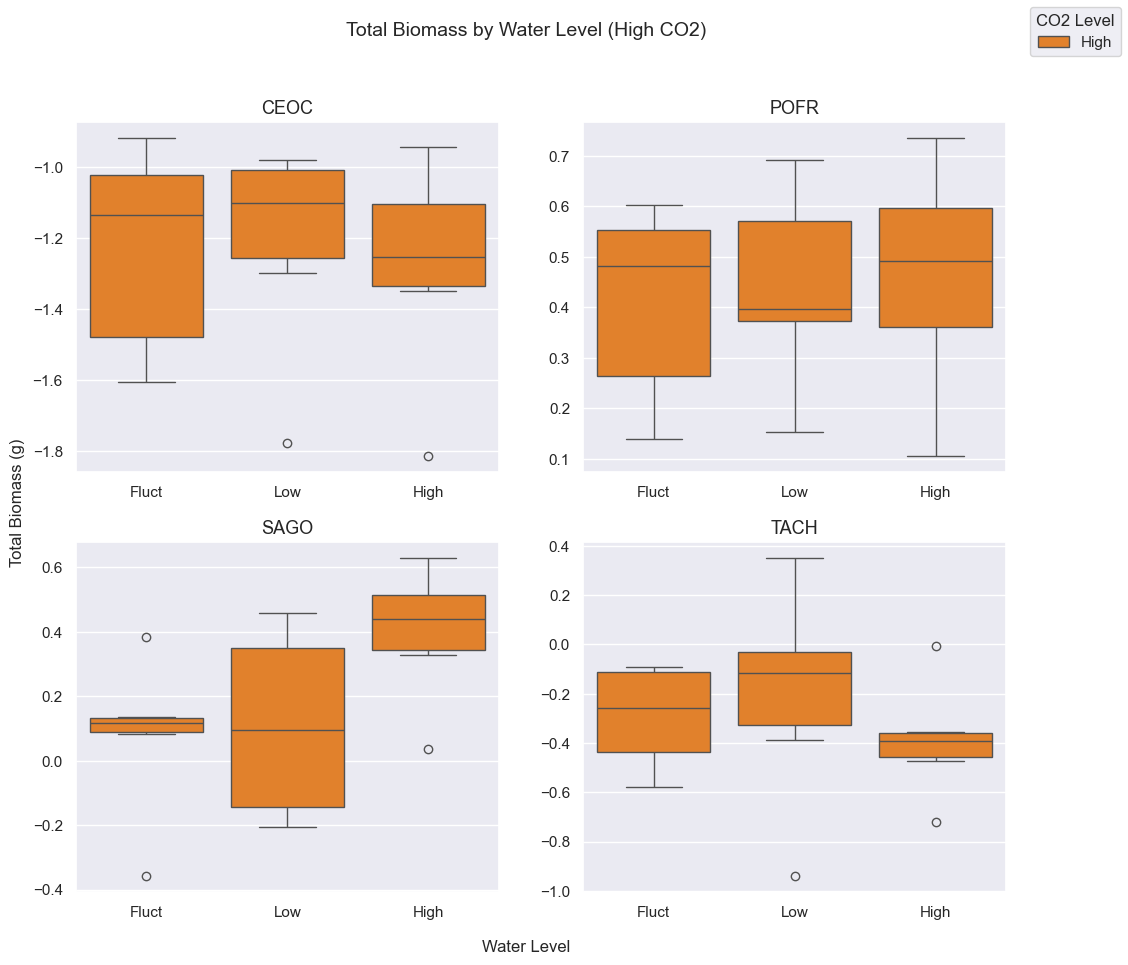

In [59]:
plot_multiple_boxplots(df2[df2['co2_cat']=='High'], by = 'species', x = 'water_lvl', y = 'total_biomass', 
                           hue = 'co2_cat', subplots = {'nrows':2, 'ncols':2, 'figsize':(12,10)}, 
                           palette=['tab:orange'],
                           xlabel='Water Level', ylabel='Total Biomass (g)',legend_title='CO2 Level',
                           suptitle='Total Biomass by Water Level (High CO2)',
                           fig_save_path='figures/woody_total_biomass_by_co2.png')

In [60]:
df2.treatment.value_counts()

treatment
CO2High_WA    24
CO2High_WH    24
CO2High_WL    24
CO2Amb_WA     23
CO2Amb_WH     23
CO2Amb_WL     23
Name: count, dtype: int64

In [61]:
#Export model ready data
df2.to_csv('./data/woody_transplants_model_rdy.csv')